<a href="https://colab.research.google.com/github/Mary-prh/CNN_food_classification/blob/main/food_type_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**

In [1]:
import tensorflow as tf
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-09 20:13:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.164.144, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   194MB/s    in 0.5s    

2022-08-09 20:13:56 (194 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**Explore Data** 

In [3]:
ls pizza_steak

test/  train/


In [4]:
# provides functions for interacting with the operating system 
import os

In [5]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
ls pizza_steak/train/

pizza/  steak/


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak')) # Return the number of items in a container
num_steak_images_train

750

**The pathlib is a Python module which provides an object API for working with files and directories** 

In [8]:
import pathlib as pl
import numpy as np

In [9]:
data_dir = pl.Path("pizza_steak/train") # turn our training path into a Python path
data_dir

PosixPath('pizza_steak/train')

In [10]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
# created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


**Visualizing random images from the database**

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [12]:
def view_images_randomly(folder, train_or_test , subfolder):
     # Setup target directory (we'll view images from here)
  target_folder = folder+'/'+train_or_test+'/'+subfolder

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(subfolder)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

3401720.jpg
Image shape: (512, 512, 3)


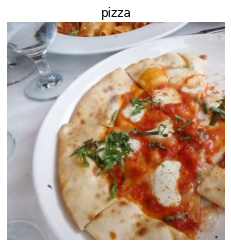

In [13]:
img = view_images_randomly(folder="pizza_steak", train_or_test="train",subfolder="pizza")

In [14]:
img.shape

(512, 512, 3)

### **CNN Modeling**

**1. Normalizing data**

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# set the seed
tf.random.set_seed(42)

In [17]:
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

In [18]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Import data from directories and turn it into batches

In [19]:
train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), 
                                           color_mode='rgb',class_mode='binary', batch_size=32, 
                                           shuffle=True, seed=42)

Found 1500 images belonging to 2 classes.


In [20]:
test_data = valid_gen.flow_from_directory(test_dir, target_size=(224, 224), 
                                           color_mode='rgb',class_mode='binary', batch_size=32, 
                                           shuffle=True, seed=42)

Found 500 images belonging to 2 classes.


**2. Creating the CNN model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer , Dropout , Flatten , Dense , Conv2D , MaxPool2D

Defining the model

In [22]:
model_1 = Sequential()

In [23]:
model_1.add(Conv2D(filters= 10, kernel_size=3
                , activation = "relu",
                input_shape=(224, 224, 3)))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Flatten())
model_1.add(Dense(1,activation='sigmoid'))

Compling

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate= 0.001)

model_1.compile(optimizer=opt , loss= 'binary_crossentropy', metrics=['accuracy'])

fitting the model

*(47 is coming from total samples/batch_size (1500/32 = 47))*

In [25]:
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data) 
, validation_data= test_data , validation_steps = len(test_data) )

Epoch 1/5
47/47 [==============================] - 24s 217ms/step - loss: 0.5670 - accuracy: 0.7047 - val_loss: 0.4186 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4316 - accuracy: 0.8073 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4047 - accuracy: 0.8213 - val_loss: 0.3236 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3761 - accuracy: 0.8413 - val_loss: 0.3364 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3390 - accuracy: 0.8587 - val_loss: 0.2938 - val_accuracy: 0.8900


# **Model 2: Non-CNN**

In [26]:
tf.random.set_seed(42)
model_2 = Sequential()

In [27]:
model_2.add(Flatten(input_shape=(224, 224, 3)))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [28]:
opt = tf.keras.optimizers.Adam()

model_2.compile(optimizer=opt , loss= 'binary_crossentropy', metrics=['accuracy'])

In [29]:
model_2.fit(train_data,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 2.2462 - accuracy: 0.6360 - val_loss: 1.9511 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 1.0000 - accuracy: 0.6913 - val_loss: 0.4709 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5901 - accuracy: 0.7467 - val_loss: 0.4675 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5629 - accuracy: 0.7687 - val_loss: 0.5703 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.5210 - accuracy: 0.7793 - val_loss: 0.4869 - val_accuracy: 0.7900


In [30]:
# check out the output shapes by each layer
model_1.summary() ,

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

(None,)

###by checking the summary of both models, we notice that the number of trainable parameters are hugely large for a non-CNN model. 

###(mostly in the case of computer vision problems the CNN works much better and faster)

In [31]:
 model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [32]:
len(train_data)

47

In [33]:
image , label = train_data.next()

In [34]:
len(image), len(label)

(32, 32)

In [35]:
# it is normalized
image[:1] 

array([[[[0.25882354, 0.21568629, 0.13725491],
         [0.31764707, 0.28235295, 0.22352943],
         [0.3254902 , 0.28235295, 0.25882354],
         ...,
         [0.10980393, 0.05882353, 0.08627451],
         [0.10588236, 0.05490196, 0.08235294],
         [0.10196079, 0.05882353, 0.08235294]],

        [[0.32941177, 0.29411766, 0.227451  ],
         [0.30588236, 0.26666668, 0.21960786],
         [0.30588236, 0.26666668, 0.23137257],
         ...,
         [0.10980393, 0.05882353, 0.08627451],
         [0.1137255 , 0.0627451 , 0.09019608],
         [0.10588236, 0.0627451 , 0.08627451]],

        [[0.29411766, 0.25490198, 0.21960786],
         [0.32941177, 0.2901961 , 0.25490198],
         [0.30980393, 0.2784314 , 0.23529413],
         ...,
         [0.1137255 , 0.0627451 , 0.09019608],
         [0.10588236, 0.05490196, 0.08235294],
         [0.10980393, 0.06666667, 0.09019608]],

        ...,

        [[0.03529412, 0.03137255, 0.01568628],
         [0.03529412, 0.03137255, 0.01568628]

In [36]:
image[0].shape

(224, 224, 3)

In [37]:
label

array([0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

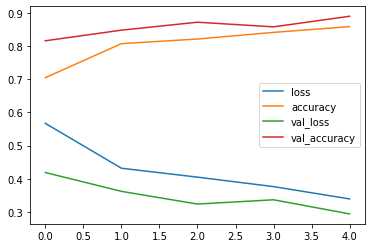

In [38]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

# **Model 3:**

In [39]:
model_3 = Sequential()
model_3.add(Conv2D(filters= 10, kernel_size=3
                , activation = "relu",
                input_shape=(224, 224, 3)))

model_3.add(MaxPool2D())

model_3.add(Conv2D(10,3,activation='relu'))
model_3.add(MaxPool2D())

model_3.add(Conv2D(10,3,activation='relu'))
model_3.add(MaxPool2D())

model_3.add(Flatten())
model_3.add(Dense(1,activation='sigmoid'))

In [40]:
model_3.compile(optimizer='Adam' , loss = 'binary_crossentropy', 
                metrics= ['accuracy'])

In [41]:
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data = test_data, validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6246 - accuracy: 0.6480 - val_loss: 0.4946 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4730 - accuracy: 0.7840 - val_loss: 0.4241 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4433 - accuracy: 0.7960 - val_loss: 0.4401 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4262 - accuracy: 0.8067 - val_loss: 0.3624 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4115 - accuracy: 0.8220 - val_loss: 0.3283 - val_accuracy: 0.8480


In [42]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

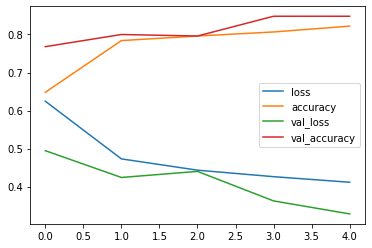

In [43]:
pd.DataFrame(history_3.history).plot()

# **Data Aumentation**

**shuffle is false for demonstration only**

**otherwise our model only sees a batch of a single kind of images at a time.**

In [44]:
train_augmentation = ImageDataGenerator(rescale=1./255,
                                        rotation_range= 20, width_shift_range = 0.2,
                                        shear_range = 0.2, zoom_range = 0.2, height_shift_range=0.2,
                                        horizontal_flip=True)

In [45]:
print("Augmented training images:")
train_augmented_data = train_augmentation.flow_from_directory(train_dir, target_size=(224,224),
                                                              batch_size = 32, class_mode = 'binary',
                                                              shuffle=False) 
#

Augmented training images:
Found 1500 images belonging to 2 classes.


In [46]:
train_data = train_gen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

Found 1500 images belonging to 2 classes.


**visualizing original image and the augmented sample**

In [47]:
image , label = train_data.next()

In [48]:
aug_image , aug_label = train_augmented_data.next()

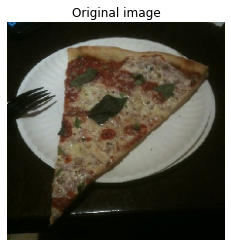

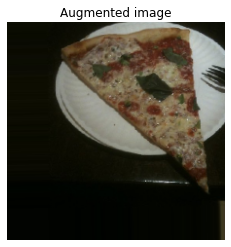

In [49]:
random_number = random.randint(0,31) # as the batch size
plt.imshow(image[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_image[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# **model 4: data augmented**

In [50]:
train_augmented_data_shuffled = train_augmentation.flow_from_directory(train_dir, target_size=(224,224),
                                                              batch_size = 32, class_mode = 'binary',
                                                              shuffle=True) 

Found 1500 images belonging to 2 classes.


In [51]:
tf.random.set_seed(42)
model_4 = Sequential()
model_4.add(Conv2D(filters= 10, kernel_size=3
                , activation = "relu",
                input_shape=(224, 224, 3)))

model_4.add(MaxPool2D())

model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(MaxPool2D())

model_4.add(Conv2D(10,3,activation='relu'))
model_4.add(MaxPool2D())

model_4.add(Flatten())
model_4.add(Dense(1,activation='sigmoid'))

In [52]:
model_4.compile(optimizer='Adam' , loss = 'binary_crossentropy', 
                metrics= ['accuracy'])

In [53]:
history_4 = model_4.fit(train_augmented_data_shuffled, epochs=5, 
                        steps_per_epoch=len(train_augmented_data_shuffled),
                        validation_data = test_data, validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 23s 468ms/step - loss: 0.6218 - accuracy: 0.6493 - val_loss: 0.4982 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5450 - accuracy: 0.7187 - val_loss: 0.4436 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4833 - accuracy: 0.7553 - val_loss: 0.3795 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4655 - accuracy: 0.7913 - val_loss: 0.3224 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4514 - accuracy: 0.7913 - val_loss: 0.3184 - val_accuracy: 0.8780


# **Making prediction on an image**

In [54]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-08-09 20:18:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-08-09 20:18:53 (231 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



(-0.5, 3023.5, 4031.5, -0.5)

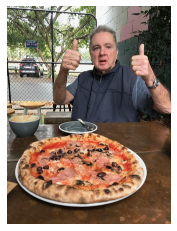

In [55]:
import matplotlib.image as mpimg
pizza = mpimg.imread('03-pizza-dad.jpeg')
plt.imshow(pizza)
plt.axis(False)

In [56]:
pizza.shape

(4032, 3024, 3)

In [57]:
def prep_image (filename , img_shape):
  img  = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img , size = [img_shape , img_shape])
  img = img/255.
  img = tf.expand_dims(img, axis=0)
  return img

In [58]:
pizza = prep_image('03-pizza-dad.jpeg', img_shape=224)
pizza

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.2887255 , 0.3009804 , 0.2632353 ],
         [0.44705883, 0.47843137, 0.39607844],
         [0.57598037, 0.5955882 , 0.5093137 ],
         ...,
         [0.05686275, 0.06862745, 0.04117647],
         [0.05588235, 0.0754902 , 0.04803922],
         [0.07745098, 0.08921569, 0.06176471]],

        [[0.9377451 , 0.9553922 , 0.9651961 ],
         [0.8838235 , 0.9102941 , 0.92107844],
         [0.9411765 , 0.9607843 , 0.9588235 ],
         ...,
         [0.04313726, 0.05490196, 0.02745098],
         [0.07843138, 0.09019608, 0.0627451 ],
         [0.08186275, 0.10147059, 0.07401961]],

        [[0.12745099, 0.13529412, 0.12352941],
         [0.175     , 0.17450981, 0.16617647],
         [0.12941177, 0.14901961, 0.13333334],
         ...,
         [0.03431373, 0.05196078, 0.0245098 ],
         [0.05833333, 0.07009804, 0.04264706],
         [0.05343137, 0.08088236, 0.0495098 ]],

        ...,

        [[0.24264705, 0.16029412, 

In [59]:
pred = model_4.predict(pizza)
pred

array([[0.30986926]], dtype=float32)

**we need to index the predictions to understand the output**

In [60]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [61]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

### **Prediction result: class_name[int(tf.round(pred))]**

In [62]:
def predict_image (filename , img_shape , model, class_name):
  img  = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img , size = [img_shape , img_shape])
  img = img/255.
  plt.imshow(img)
  plt.axis(False)
  img = tf.expand_dims(img, axis=0)
  pred = model.predict(img)
  pred_class = class_name[int(tf.round(pred))]
  plt.title(f"Prediction: {pred_class}")
  return pred_class

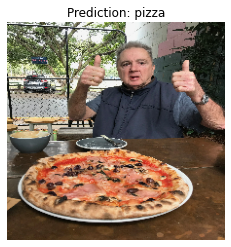

In [63]:
result = predict_image('03-pizza-dad.jpeg', 224, model_4,class_names)

In [64]:
!wget https://fullofsteak.com/wp-content/uploads/2019/07/cropped-Ribeye_steak_Pizza.jpg

--2022-08-09 20:18:56--  https://fullofsteak.com/wp-content/uploads/2019/07/cropped-Ribeye_steak_Pizza.jpg
Resolving fullofsteak.com (fullofsteak.com)... 70.32.23.73
Connecting to fullofsteak.com (fullofsteak.com)|70.32.23.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147648 (144K) [image/jpeg]
Saving to: ‘cropped-Ribeye_steak_Pizza.jpg’

cropped-Ribeye_stea 100%[===================>] 144.19K  --.-KB/s    in 0.05s   

2022-08-09 20:18:56 (2.82 MB/s) - ‘cropped-Ribeye_steak_Pizza.jpg’ saved [147648/147648]



In [65]:
result = predict_image('cropped-Ribeye_steak_Pizza.jpg', 224, model_4,class_names)

NotFoundError: ignored

# **Multi-Class Classification**

In [66]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2022-08-09 20:22:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   161MB/s    in 3.1s    

2022-08-09 20:22:06 (161 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

### **Explore data**

In [68]:
import os
for dirpath , filenames, dirnames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 2 images in '10_food_classes_all_data'.
There are 0 directories and 10 images in '10_food_classes_all_data/test'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/steak'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/ramen'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/ice_cream'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/chicken_curry'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/sushi'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/fried_rice'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/chicken_wings'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/hamburger'.
There are 250 directories and 0 images in '10_food_classes_all_data/test/pizza'.
There are 

In [69]:
import pathlib as pl
import numpy as np

In [70]:
data_dir = pl.Path('10_food_classes_all_data/train')
data_dir

PosixPath('10_food_classes_all_data/train')

In [71]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
# created a list of class_names from the subdirectories
print(class_names) , len(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


(None, 10)

### **Visualizing random data**

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [73]:
def view_images_randomly(folder, train_or_test , subfolder):
     # Setup target directory (we'll view images from here)
  target_folder = folder+'/'+train_or_test+'/'+subfolder

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(subfolder)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

3708711.jpg
Image shape: (512, 512, 3)


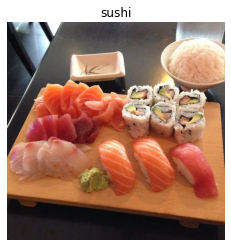

In [74]:
image = view_images_randomly('10_food_classes_all_data', 'train', 
                             subfolder= random.choice(class_names))

### **Preprocessing**

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
train_dir = pl.Path('10_food_classes_all_data/train')
test_dir = pl.Path('10_food_classes_all_data/test')

In [77]:
train_augmentation = ImageDataGenerator(rescale=1./255,
                                        rotation_range= 20, width_shift_range = 0.2,
                                        shear_range = 0.2, zoom_range = 0.2, height_shift_range=0.2,
                                        horizontal_flip=True)

In [78]:
train_datagen = train_augmentation.flow_from_directory(train_dir, target_size= (224,224), batch_size=32, 
                                                       class_mode= 'categorical')

Found 7500 images belonging to 10 classes.


In [79]:
test_augmentation = ImageDataGenerator(rescale=1./255)


test_datagen = train_augmentation.flow_from_directory(test_dir, target_size= (224,224), batch_size=32, 
                                                       class_mode= 'categorical')

Found 2500 images belonging to 10 classes.


## **CNN Model**

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense

In [81]:
tf.random.set_seed(42)
modelMC_1 = Sequential()

modelMC_1.add(Conv2D(input_shape = (224,224,3), activation='relu',filters= 10 , 
                     strides = 1, kernel_size = 3))
modelMC_1.add(Conv2D(10,3, activation='relu'))
modelMC_1.add(MaxPool2D())

modelMC_1.add(Conv2D(10,3, activation='relu'))
modelMC_1.add(Conv2D(10,3, activation='relu'))
modelMC_1.add(MaxPool2D())

modelMC_1.add(Flatten())
modelMC_1.add(Dense(10, activation= 'softmax'))

In [82]:
modelMC_1.compile(optimizer='adam', loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

In [83]:
historyMC_1  = modelMC_1.fit(train_datagen, steps_per_epoch= len(train_datagen),
                             validation_data= test_datagen, validation_steps=len(test_datagen),
                             epochs= 5)

Epoch 1/5
235/235 [==============================] - 141s 598ms/step - loss: 2.1976 - accuracy: 0.1881 - val_loss: 2.0890 - val_accuracy: 0.2404
Epoch 2/5
235/235 [==============================] - 134s 572ms/step - loss: 2.0822 - accuracy: 0.2552 - val_loss: 2.0344 - val_accuracy: 0.2604
Epoch 3/5
235/235 [==============================] - 133s 565ms/step - loss: 2.0392 - accuracy: 0.2805 - val_loss: 1.9658 - val_accuracy: 0.2936
Epoch 4/5
235/235 [==============================] - 133s 568ms/step - loss: 2.0098 - accuracy: 0.3011 - val_loss: 1.9846 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 133s 568ms/step - loss: 1.9939 - accuracy: 0.3020 - val_loss: 1.8997 - val_accuracy: 0.3416


In [84]:
import pandas as pd


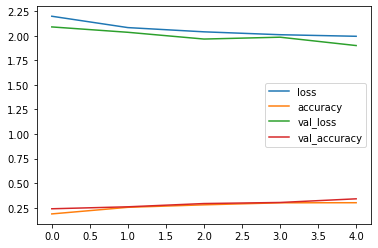

In [85]:
pd.DataFrame(historyMC_1.history).plot()

it turns out the system is working well, but it needs to run for longer or with different methods of data augmentation.

## **prediction result: class_name[pred.argmax()]**

In [86]:
def predict_image (filename , img_shape , model, class_name):
  img  = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img , size = [img_shape , img_shape])
  img = img/255.
  plt.imshow(img)
  plt.axis(False)
  img = tf.expand_dims(img, axis=0)
  pred = model.predict(img)
  pred_class = class_name[pred.argmax()]
  plt.title(f"Prediction: {pred_class}")
  return pred_class

In [87]:
!wget https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/00/a0000370/img/basic/a0000370_main.jpg?20201002142956&q=80&rw=750&rh=536

--2022-08-09 20:33:27--  https://rimage.gnst.jp/livejapan.com/public/article/detail/a/00/00/a0000370/img/basic/a0000370_main.jpg?20201002142956
Resolving rimage.gnst.jp (rimage.gnst.jp)... 18.67.76.126, 18.67.76.9, 18.67.76.24, ...
Connecting to rimage.gnst.jp (rimage.gnst.jp)|18.67.76.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91181 (89K) [image/jpeg]
Saving to: ‘a0000370_main.jpg?20201002142956’

a0000370_main.jpg?2 100%[===================>]  89.04K  --.-KB/s    in 0.002s  

2022-08-09 20:33:29 (43.6 MB/s) - ‘a0000370_main.jpg?20201002142956’ saved [91181/91181]



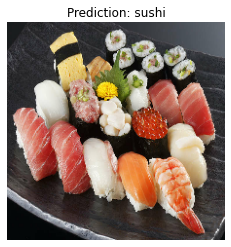

In [89]:
result = predict_image('a0000370_main.jpg?20201002142956', 224, modelMC_1,class_names)

In [90]:
modelMC_1.save('CNN_MCC_1')

INFO:tensorflow:Assets written to: CNN_MCC_1/assets


In [91]:
loaded_model = tf.keras.models.load_model('CNN_MCC_1')
loaded_model.evaluate(test_datagen)

79/79 [==============================] - 35s 440ms/step - loss: 1.8982 - accuracy: 0.3400


[1.898171305656433, 0.3400000035762787]